In [1]:
import pandas as pd
import statsmodels.formula.api as smf

data=pd.read_csv('ex9-10.csv')
data.head(4)

,YEAR,Q,t,X,Y
0,1995,1,1,2742.9,273792
1,1995,2,2,2692.0,261643
2,1995,3,3,2722.5,266102
3,1995,4,4,2777.0,268958


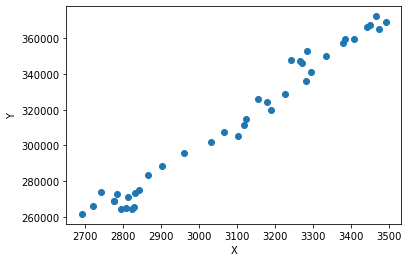

In [2]:
#Xt와 Yt의 산점도
import matplotlib.pylab as plt
plt.plot(data['X'], data['Y'], 'o')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

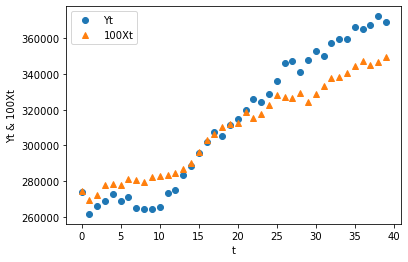

In [3]:
#100Xt와 Yt의 산점도
plt.plot(data['Y'], 'o', label='Yt')
plt.plot(data['X']*100, '^', label='100Xt')
plt.legend()
plt.xlabel('t')
plt.ylabel('Yt & 100Xt')
plt.show()

In [14]:
#Durbin-Watson 통계량 방법1
fit=smf.ols('Y~X', data).fit()
print(fit.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.396   
Dependent Variable: Y                AIC:                381.7369
Date:               2022-12-07 08:42 BIC:                385.7149
No. Observations:   54               Log-Likelihood:     -188.87 
Df Model:           1                F-statistic:        35.79   
Df Residuals:       52               Prob (F-statistic): 2.05e-07
R-squared:          0.408            Scale:              66.353  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept     56.1569    3.9937  14.0615  0.0000  48.1430  64.1708
X              0.5800    0.0970   5.9827  0.0000   0.3855   0.7746
-----------------------------------------------------------------
Omnibus:              0.517        Durbin-Watson:           2.343
Prob(Omnibus):        

In [5]:
#Durbin-Watson 통계량 방법1
fit=smf.ols('Y~X', data).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     1684.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):           4.42e-33
Time:                        08:22:09   Log-Likelihood:                -402.32
No. Observations:                  40   AIC:                             808.6
Df Residuals:                      38   BIC:                             812.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.42e+05   1.11e+04    -12.754      0.0

In [6]:
#Durbin-Watson 통계량 방법2
from statsmodels.stats.stattools import durbin_watson
residual=fit.resid_pearson
durbin_watson(residual)

0.9344731674533778

In [9]:
# 예제9-11: Cochrane-orcutt 방법
# GLSAR : 일반화최소제곱(GLS)자기회귀방법(AR)
import statsmodels.api as sm
Corc = sm.GLSAR(data['Y'],sm.add_constant(data['X']), rho=0.005)    #상수항 추가
Corc_fit = Corc.iterative_fit(maxiter = 10)

print(Corc_fit.summary2())

            Results: Generalized least squares with AR(p)
Model:               GLSAR             Adj. R-squared:      0.945     
Dependent Variable:  Y                 AIC:                 773.4237  
Date:                2022-12-07 08:37  BIC:                 776.7508  
No. Observations:    39                Log-Likelihood:      -384.71   
Df Model:            1                 F-statistic:         649.1     
Df Residuals:        37                Prob (F-statistic):  4.62e-25  
R-squared:           0.946             Scale:               2.2830e+07
----------------------------------------------------------------------
         Coef.      Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------
const -142869.6340 18100.5173 -7.8931 0.0000 -179544.7656 -106194.5023
X         147.3886     5.7849 25.4783 0.0000     135.6673     159.1099
----------------------------------------------------------------------
Omnibus:           

In [10]:
print(Corc.rho)

[0.48581974]


In [11]:
# WLS : 가중치최소제곱추정방법
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pylab as plt

data=pd.read_csv('ex9-11.csv')
data.head(5)

,i,X,Y
0,1,27,73
1,2,21,66
2,3,22,63
3,4,26,79
4,5,25,68


In [18]:
fit=smf.ols('Y~X', data).fit()
print(fit.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.396   
Dependent Variable: Y                AIC:                381.7369
Date:               2022-12-07 08:43 BIC:                385.7149
No. Observations:   54               Log-Likelihood:     -188.87 
Df Model:           1                F-statistic:        35.79   
Df Residuals:       52               Prob (F-statistic): 2.05e-07
R-squared:          0.408            Scale:              66.353  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept     56.1569    3.9937  14.0615  0.0000  48.1430  64.1708
X              0.5800    0.0970   5.9827  0.0000   0.3855   0.7746
-----------------------------------------------------------------
Omnibus:              0.517        Durbin-Watson:           2.343
Prob(Omnibus):        

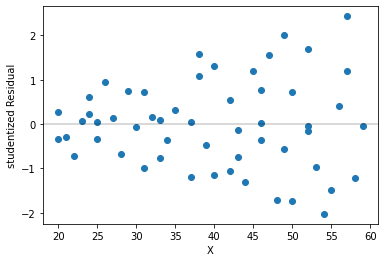

In [19]:
plt.plot(data.X, fit1.resid_pearson, 'o')
plt.axhline(y=0, color="k", linewidth=0.3)
plt.xlabel('X')
plt.ylabel('studentized Residual')
plt.show()

In [20]:
import numpy as np
data['resid']=fit.resid
data['abs_resid']=abs(fit.resid)
data.head(5)

,i,X,Y,resid,abs_resid
0,1,27,73,1.182239,1.182239
1,2,21,66,-2.337576,2.337576
2,3,22,63,-5.917607,5.917607
3,4,26,79,7.762270,7.762270
4,5,25,68,-2.657699,2.657699


In [23]:
fit1=smf.ols('abs_resid~X', data).fit()    #가중치를 구할 회귀분석
#가중치
w=1/np.square(fit1.predict())
#가중회귀모형
wfit=smf.wls('Y~X', data, weights=w).fit()
print(wfit.summary2())

                 Results: Weighted least squares
Model:              WLS              Adj. R-squared:     0.512   
Dependent Variable: Y                AIC:                366.5121
Date:               2022-12-07 08:49 BIC:                370.4901
No. Observations:   54               Log-Likelihood:     -181.26 
Df Model:           1                F-statistic:        56.64   
Df Residuals:       52               Prob (F-statistic): 7.19e-10
R-squared:          0.521            Scale:              1.4714  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept     55.5658    2.5209  22.0419  0.0000  50.5072  60.6244
X              0.5963    0.0792   7.5260  0.0000   0.4373   0.7553
-----------------------------------------------------------------
Omnibus:              7.974        Durbin-Watson:           2.284
Prob(Omnibus):        

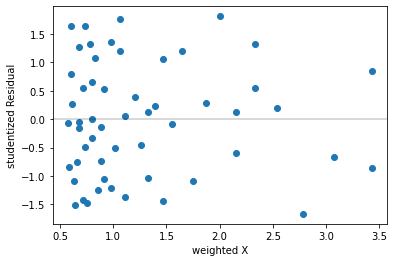

In [24]:
# 잔차도표
w_X=data['X']*1/np.square(fit1.predict())
plt.plot(w_X, wfit.resid_pearson, 'o')
plt.axhline(y=0, color="k", linewidth=0.3)
plt.xlabel('weighted X')
plt.ylabel('studentized Residual')
plt.show()

In [25]:
wfit=smf.wls('Y~X', data, weights=1/np.var(fit1.predict())).fit()
print(wfit.summary2())

                 Results: Weighted least squares
Model:              WLS              Adj. R-squared:     0.396   
Dependent Variable: Y                AIC:                381.7369
Date:               2022-12-07 08:49 BIC:                385.7149
No. Observations:   54               Log-Likelihood:     -188.87 
Df Model:           1                F-statistic:        35.79   
Df Residuals:       52               Prob (F-statistic): 2.05e-07
R-squared:          0.408            Scale:              12.925  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept     56.1569    3.9937  14.0615  0.0000  48.1430  64.1708
X              0.5800    0.0970   5.9827  0.0000   0.3855   0.7746
-----------------------------------------------------------------
Omnibus:              0.517        Durbin-Watson:           2.343
Prob(Omnibus):        